In [1]:
### Download libraries
#%pip install uproot 
#%pip install awkward 
#%pip install mplhep 
#%pip install numpy 
#%pip install matplotlib 
#%pip install scipy
### Upgrade libraries to latest version
#%pip install uproot awkward mplhep numpy matplotlib scipy --upgrade

In [2]:
import uproot
import awkward as ak
import mplhep
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit

In [3]:
path_data = 'opal_data/mc/'
file = uproot.open(path_data+'qq.root')
ttree_name = 'myTTree'
file[ttree_name].keys()
branches = file[ttree_name].arrays()
## here, we can determine arbitrary the values of ee that we need..
var1 = 'Ncharged'
var2 = 'Pcharged'
var3 = 'E_ecal'
var4 = 'E_hcal'
var5 = 'cos_thet'
var6 = 'cos_thru'
var7 = 'E_lep'
## converting the ak arrays into np arrays
nchar = ak.to_numpy(branches[var1])
pchar = ak.to_numpy(branches[var2])
Ecal  = ak.to_numpy(branches[var3])
Hcal  = ak.to_numpy(branches[var4])
cos_theta = ak.to_numpy(branches[var5])
cos_thrust = ak.to_numpy(branches[var6])
Elep =ak.to_numpy(branches[var7])
print(len(nachar))

# Plotting the data of MonteCarlo to check if it's as expected

0.7336816 999.0


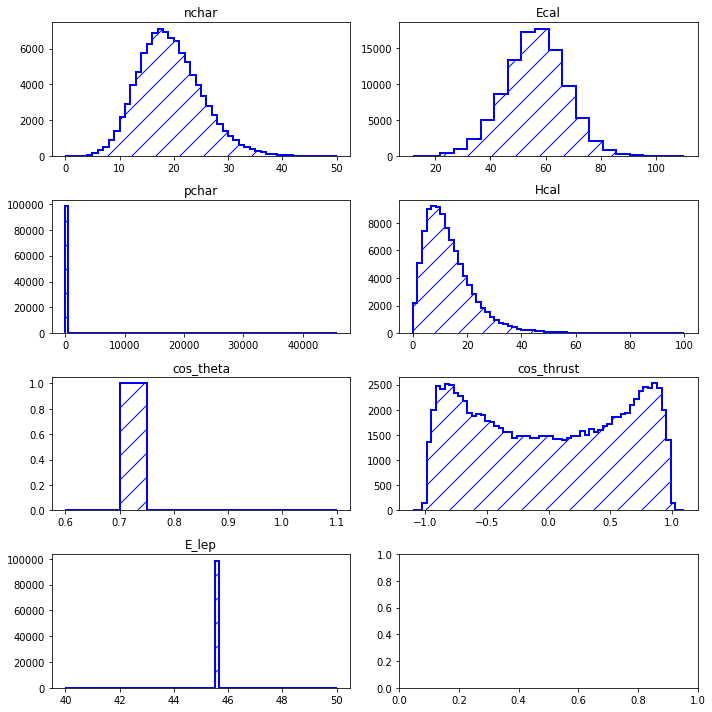

In [4]:
##comparing all Ecal(SumE)
#print(min(nchar),max(nchar))
#print(min(pchar),max(pchar))
#print(min(Ecal),max(Ecal))
#print(min(Hcal),max(Hcal))
print(min(cos_theta),max(cos_theta))
#print(min(cos_thrust),max(cos_thrust))
fig, axs = plt.subplots(4, 2, figsize=(10,10))
axs[0, 0].hist(nchar,bins=50,range=(0,50), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
axs[0, 0].set_title("nchar")
axs[1, 0].hist(pchar,bins=100,range=(0,45700), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
axs[1, 0].set_title("pchar")
axs[0, 1].hist(Ecal,bins=20,range=(12,110), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
axs[0, 1].set_title("Ecal")
axs[1, 1].hist(Hcal,bins=60,range=(0,100), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
axs[1, 1].set_title("Hcal")
axs[2,0].hist(cos_theta,bins=10,range=(0.6,1.1), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
axs[2,0].set_title("cos_theta")
axs[2,1].hist(cos_thrust,bins=60,range=(-1.1,1.1), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
axs[2,1].set_title("cos_thrust")
axs[3,0].hist(Elep,bins=60,range=(40,50), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
axs[3,0].set_title("E_lep")
fig.tight_layout()

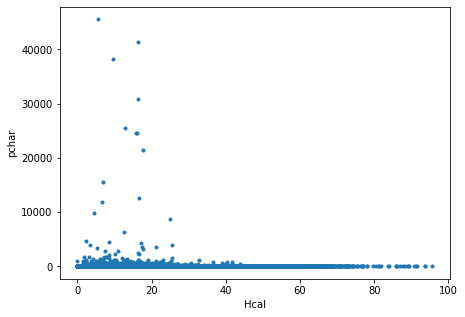

In [5]:
## Plot Hcal vs Pcharged
plt.figure(figsize=(7,5))
plt.plot(Hcal,pchar,'.')

plt.xlabel('Hcal')
plt.ylabel('pchar')
plt.show()

# Applying the cut(s)

3.0 48.0


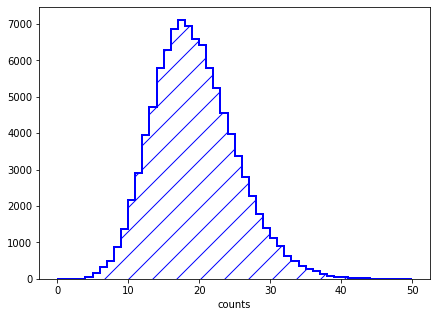

In [6]:
## Does mc look like we expected from the Grope simulator?
print(min(nchar),max(nchar))
plt.figure(figsize=(7,5))
bin_content, bin_edges, _= plt.hist(nchar,bins=50,range=(0,50), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
plt.xlabel('counts')
#plt.xlim(0,100)
plt.show() ## the awnser is definetly yesno because from [20,60] it is as expected but for < 20 there are still 'a lot' of counts

In [7]:
cut_CtrkN = (branches['Ncharged'] >= 10) & (branches['Ncharged'] <= 60) ## '<='  means that the values below 'survive' the cut
cut_CtrkN = ak.to_numpy(cut_CtrkN)
#print(type(cut_CtrkN))

In [8]:
eff = sum(cut_CtrkN)/len(cut_CtrkN)
print(eff)

0.9669652912350476


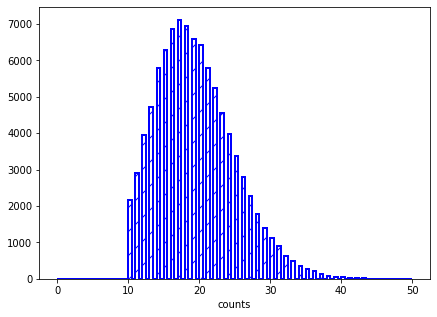

In [9]:
plt.figure(figsize=(7,5))
bin_content, bin_edges, _= plt.hist(nchar[cut_CtrkN],bins=100,range=(0,50), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
plt.xlabel('counts')
#plt.xlim(0,100)
plt.show()